<a href="https://colab.research.google.com/github/Krishan-Kumar-kk/Neural-network/blob/main/Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [6]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**# Part 2 - Now let's make the ANN!**

In [9]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [27]:
# Initialising the ANN
classifier = Sequential()

In [28]:
# Adding the input layer and the first hidden layer
#classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units = 10, kernel_initializer= 'he_normal',activation='relu',input_dim = 11))

In [ ]:
classifier.add(Dropout=0.3)     #adding dropout layer

In [29]:
# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))

In [ ]:
classifier.add(Dropout=0.4)

In [30]:
# Adding the Third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))

In [ ]:
classifier.add(Dropout=0.2)

In [31]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [32]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6222 - accuracy: 0.6633 - val_loss: 0.4969 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4678 - accuracy: 0.8039 - val_loss: 0.4683 - val_accuracy: 0.8008
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4520 - accuracy: 0.8032 - val_loss: 0.4481 - val_accuracy: 0.8039
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4296 - accuracy: 0.8162 - val_loss: 0.4325 - val_accuracy: 0.8137
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4125 - accuracy: 0.8287 - val_loss: 0.4205 - val_accuracy: 0.8160
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3979 - accuracy: 0.8319 - val_loss: 0.4112 - val_accuracy: 0.8247
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3901 - accuracy: 0.8383 - val_loss: 0.4039 - val_accuracy: 0.8266

In [35]:
# list all data in history

print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


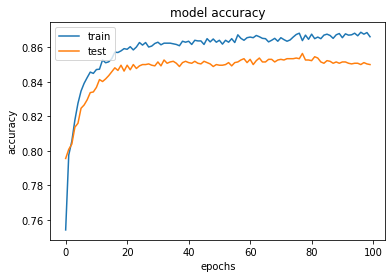

In [36]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



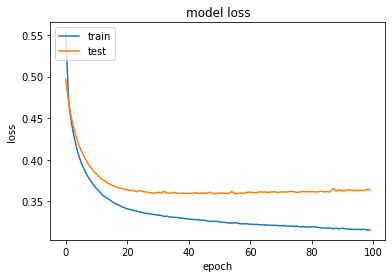

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**# Part 3 - Making the predictions and evaluating the model**

In [38]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1492,  103],
       [ 191,  214]])

In [40]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.853